In [1]:
# set up notebook
%load_ext autoreload
%autoreload 2

import os
import natsort
from PadAnalyser import FrameSets
import matplotlib.pyplot as plt

In [2]:
# define a frame set from a set of tiff images
IMAGE_PATH = 'sample_images'
image_filenames = natsort.natsorted(os.listdir(IMAGE_PATH)) # sort filenames in natural order

image_filenames = image_filenames[:3]

image_paths = [os.path.join(IMAGE_PATH, f) for f in image_filenames] # get full paths
times_in_seconds = [int(f.split('_')[-5]) for f in image_filenames] # extract time from filename

frame_set = FrameSets.TiffFrameSet(
    label='test',
    image_type='brightfield',
    metadata={'experiment': 'BE142', 'pad_name': 'A12', 'row': 'A', 'col': 12}, # information that is not used in analysis, put placed as columns into final dataframe
    file_paths=image_paths, 
    times_in_seconds=times_in_seconds, 
    frame_labels=None,
)

print(frame_set)

TiffFrameSet with 3 frames


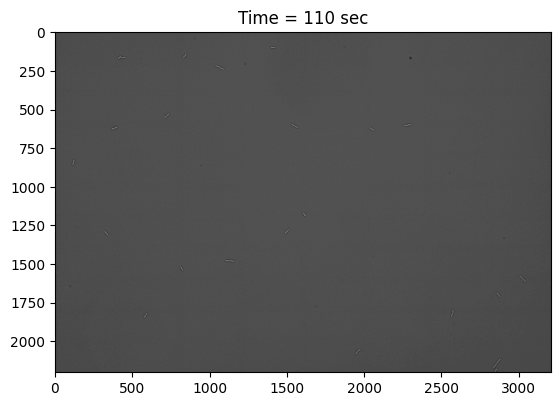

In [3]:
# Preview the frames
for frame, time_in_seconds in frame_set[:1]:
    plt.figure()
    plt.imshow(frame, cmap='gray')
    plt.title(f'Time = {time_in_seconds} sec')

In [4]:
# Perform segmentation

from PadAnalyser import MicrocolonySegmenter
from PadAnalyser.OutputConfig import OutputConfig

output_config = OutputConfig(
    output_dir = 'tmp/output',
    work_dir = 'tmp/work',
    debug_dir = 'tmp/debug',
    mask_dir = 'tmp/masks',
    
    logging_file = 'tmp/runlog.log',

    cache_segmentation = False,
    cache_dataframe = False,

    clear_dirs = True,
    process_count = 1,
)

print(output_config)

df = MicrocolonySegmenter.segment_frame_set(frame_set=frame_set, output_config=output_config)

OutputConfig(output_dir='tmp/output', work_dir='tmp/work', debug_dir='tmp/debug', mask_dir='tmp/masks', logging_file='tmp/runlog.log', cache_segmentation=False, cache_dataframe=False, clear_dirs=True, process_count=1)
Stack has only one frame, returning that
Stack has only one frame, returning that
Stack has only one frame, returning that
3
3
3


In [5]:
# Print dataframe with statistics
df

,time,time_hours,time_days,round_time,round_time_hours,round_time_days,id,label,labelid,time_index,...,ss_aspect_ratio_75%,ss_aspect_ratio_max,ss_aspect_ratio_max_width_count,ss_aspect_ratio_max_width_mean,ss_aspect_ratio_max_width_std,ss_aspect_ratio_max_width_min,ss_aspect_ratio_max_width_25%,ss_aspect_ratio_max_width_50%,ss_aspect_ratio_max_width_75%,ss_aspect_ratio_max_width_max
0,110,0.030556,0.001273,0,0.00,0.000000,0,test,test_0,0,...,3.281074,4.041594,2.0,3.207762,2.402063,1.509247,2.358505,3.207762,4.057020,4.906278
1,110,0.030556,0.001273,0,0.00,0.000000,1,test,test_1,0,...,2.138546,2.138546,1.0,2.653850,NaN,2.653850,2.653850,2.653850,2.653850,2.653850
2,110,0.030556,0.001273,0,0.00,0.000000,2,test,test_2,0,...,1.723087,1.723087,1.0,2.117510,NaN,2.117510,2.117510,2.117510,2.117510,2.117510
3,110,0.030556,0.001273,0,0.00,0.000000,3,test,test_3,0,...,2.499135,2.499135,1.0,3.059378,NaN,3.059378,3.059378,3.059378,3.059378,3.059378
4,110,0.030556,0.001273,0,0.00,0.000000,4,test,test_4,0,...,1.676712,1.676712,1.0,2.149595,NaN,2.149595,2.149595,2.149595,2.149595,2.149595
5,110,0.030556,0.001273,0,0.00,0.000000,6,test,test_6,0,...,2.987897,2.987897,1.0,3.666371,NaN,3.666371,3.666371,3.666371,3.666371,3.666371
6,110,0.030556,0.001273,0,0.00,0.000000,7,test,test_7,0,...,1.220568,1.220568,1.0,1.807430,NaN,1.807430,1.807430,1.807430,1.807430,1.807430
7,110,0.030556,0.001273,0,0.00,0.000000,8,test,test_8,0,...,2.988498,2.988498,1.0,3.642814,NaN,3.642814,3.642814,3.642814,3.642814,3.642814
8,110,0.030556,0.001273,0,0.00,0.000000,9,test,test_9,0,...,1.703966,1.703966,1.0,2.102858,NaN,2.102858,2.102858,2.102858,2.102858,2.102858
9,110,0.030556,0.001273,0,0.00,0.000000,10,test,test_10,0,...,1.572357,1.572357,1.0,2.048634,NaN,2.048634,2.048634,2.048634,2.048634,2.048634
